---
title: Scattering Potentials
authors: [gvarnavides]
date: 2025-02-01
---

In [1]:
# %matplotlib ipympl
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
import ipywidgets

import ase
import abtem

abtem.config.set({"dask.lazy":False});

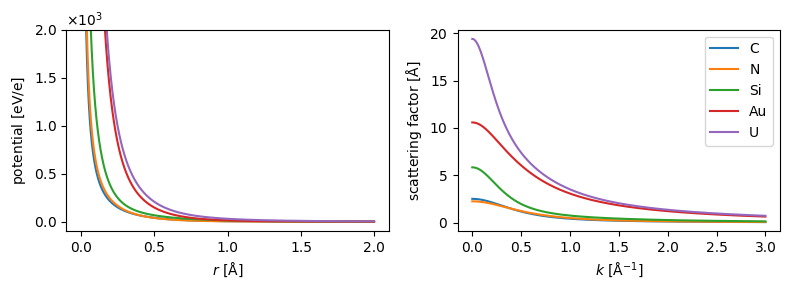

In [2]:
#| label: app:scattering_factors

symbols = ["C", "N", "Si", "Au", "U"]

parametrization = abtem.parametrizations.LobatoParametrization()

potentials = parametrization.line_profiles(symbols, cutoff=2, name="potential")
scattering_factor = parametrization.line_profiles(
    symbols, cutoff=3, name="scattering_factor"
)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 3))
visualization = potentials.show(ax=ax1, legend=False)
visualization.set_ylim([-1e2, 2e3])
scattering_factor.show(legend=True, ax=ax2)
fig.tight_layout()

In [3]:
Si3N4_crystal = ase.Atoms(
    "Si6N8",
    scaled_positions=[
        (0.82495, 0.59387, 0.75),
        (0.23108, 0.82495, 0.25),
        (0.59387, 0.76892, 0.25),
        (0.40614, 0.23108, 0.75),
        (0.76892, 0.17505, 0.75),
        (0.17505, 0.40613, 0.25),
        
        (0.66667, 0.33334, 0.75),
        (0.33334, 0.66667, 0.25),
        (0.66986, 0.70066, 0.75),
        (0.96920, 0.66986, 0.25),
        (0.70066, 0.03081, 0.25),
        (0.29934, 0.96919, 0.75),
        (0.33015, 0.29934, 0.25),
        (0.03081, 0.33014, 0.75),
    ],
    cell=[7.6045, 7.6045, 2.9052, 90, 90, 120],
    pbc=True
)

Si3N4_orthorhombic = abtem.orthogonalize_cell(Si3N4_crystal)
Si3N4_orthorhombic *= (3,2,17)

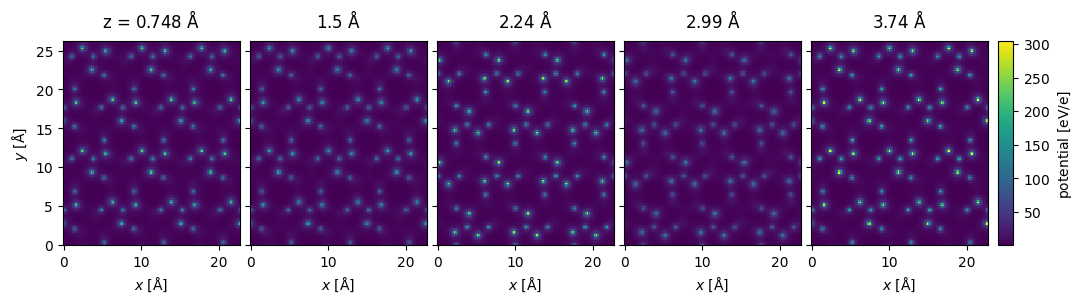

In [4]:
# | label: app:sliced_potential

potential = abtem.Potential(
    Si3N4_orthorhombic,
    # sampling = 0.1,
    gpts=(116,132),
    slice_thickness = 0.75,
    parametrization = 'lobato',
    projection = 'finite',
).build(
)

potential[:5].show(
    project=False,
    figsize=(12,4),
    common_color_scale=True,
    cbar=True,
);

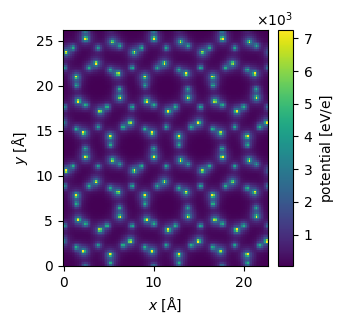

In [5]:
#| label: app:projected_potential

potential.show(
    figsize=(4,6),
    cbar=True
);